In [11]:
import pandas as pd
dataset = pd.read_csv("./datasets/TBPR_HISTORICAL_MOVEMENTS_202211021157.csv", sep=";")


In [5]:
dataset.head()
# dataset[dataset.QT_RECYCLED > 0]

,DT_REFERENCE,CASHPOINT_ID,QT_OUT,QT_IN_L4FIT,QT_IN_L4UNFIT,QT_RECYCLED,QT_L3,QT_L2,FL_MISSING,VA_DENOMINATION,CURRENCY_UNIT_ID,CO_CURRENCY,SUBGROUP,QT_CHARGE_IN,QT_CHARGE_OUT
0,2021-07-16 00:00:00.000,2,2,0,0,0,0,0,0,20.0,3,EUR,1,162,164
1,2021-07-16 00:00:00.000,2,0,0,0,0,0,0,0,50.0,4,EUR,1,174,174
2,2021-07-19 00:00:00.000,2,1,0,0,0,0,0,0,20.0,3,EUR,1,0,0
3,2021-07-19 00:00:00.000,2,0,0,0,0,0,0,1,50.0,4,EUR,1,0,0
4,2021-07-22 00:00:00.000,2,0,0,0,0,0,0,0,20.0,3,EUR,1,0,80


In [13]:
CASH_POINT_ID = dataset.CASHPOINT_ID.unique()
for cashPoint in CASH_POINT_ID:
    dataset_temp = dataset[dataset.CASHPOINT_ID == cashPoint]
    print("------------------------------------------------------------------------------------------")
    print(cashPoint+"\n")
    print(dataset_temp.describe())
    print("\n")


------------------------------------------------------------------------------------------
       CASHPOINT_ID      QT_OUT  QT_IN_L4FIT  QT_IN_L4UNFIT  QT_RECYCLED  \
count         590.0  590.000000        590.0          590.0        590.0   
mean            2.0    1.884746          0.0            0.0          0.0   
std             0.0    4.556412          0.0            0.0          0.0   
min             2.0    0.000000          0.0            0.0          0.0   
25%             2.0    0.000000          0.0            0.0          0.0   
50%             2.0    0.000000          0.0            0.0          0.0   
75%             2.0    2.000000          0.0            0.0          0.0   
max             2.0   62.000000          0.0            0.0          0.0   

       QT_L3  QT_L2  FL_MISSING  VA_DENOMINATION  CURRENCY_UNIT_ID  SUBGROUP  \
count  590.0  590.0  590.000000       590.000000        590.000000     590.0   
mean     0.0    0.0    0.527119        35.728814          3.5152

In [6]:
dataset.describe()

,CASHPOINT_ID,QT_OUT,QT_IN_L4FIT,QT_IN_L4UNFIT,QT_RECYCLED,QT_L3,QT_L2,FL_MISSING,VA_DENOMINATION,CURRENCY_UNIT_ID,SUBGROUP,QT_CHARGE_IN,QT_CHARGE_OUT
count,111402.000000,111402.000000,111402.000000,111402.000000,111402.000000,111402.000000,111402.000000,111402.000000,111402.000000,111402.000000,111402.0,111402.000000,111402.000000
mean,118.187833,107.534748,6.307310,0.380532,4.012361,0.000090,0.000009,0.021382,39.335335,3.467496,1.0,195.571040,63.791835
std,80.858321,139.863089,32.216167,3.090161,33.276708,0.010378,0.002996,0.144655,38.922568,0.836274,0.0,806.738355,354.957288
min,2.000000,0.000000,0.000000,0.000000,-2782.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.0,0.000000,0.000000
25%,48.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,1.0,0.000000,0.000000
50%,105.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,1.0,0.000000,0.000000
75%,176.000000,146.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,4.000000,1.0,0.000000,0.000000
max,338.000000,1808.000000,1756.000000,616.000000,1711.000000,2.000000,1.000000,1.000000,500.000000,7.000000,1.0,17000.000000,13595.000000


Viene eliminata la categoria SUBGROUP in quanto non ha nessun valore signficativo

In [7]:
dataset.drop(["SUBGROUP"], axis=1, inplace=True)
print(dataset.columns)

Index(['DT_REFERENCE', 'CASHPOINT_ID', 'QT_OUT', 'QT_IN_L4FIT',
       'QT_IN_L4UNFIT', 'QT_RECYCLED', 'QT_L3', 'QT_L2', 'FL_MISSING',
       'VA_DENOMINATION', 'CURRENCY_UNIT_ID', 'CO_CURRENCY', 'QT_CHARGE_IN',
       'QT_CHARGE_OUT'],
      dtype='object')


In [8]:
dataset["VALUE_QT_OUT"] = dataset["QT_OUT"] * dataset["VA_DENOMINATION"]
dataset["VALUE_QT_IN"] = dataset["QT_RECYCLED"] * dataset["VA_DENOMINATION"]
dataset["VALUE_QT_CHARGE_OUT"] = dataset["QT_CHARGE_OUT"] * dataset["VA_DENOMINATION"]
dataset["VALUE_QT_CHARGE_IN"] = dataset["QT_CHARGE_IN"] * dataset["VA_DENOMINATION"]

In [9]:
dataset_group = dataset.groupby(["CASHPOINT_ID", "DT_REFERENCE"]).sum().reset_index()
dataset_group["DT_REFERENCE"] = pd.to_datetime(dataset_group["DT_REFERENCE"]).dt.date

In [10]:
dataset_group

,CASHPOINT_ID,DT_REFERENCE,QT_OUT,QT_IN_L4FIT,QT_IN_L4UNFIT,QT_RECYCLED,QT_L3,QT_L2,FL_MISSING,VA_DENOMINATION,CURRENCY_UNIT_ID,QT_CHARGE_IN,QT_CHARGE_OUT,VALUE_QT_OUT,VALUE_QT_IN,VALUE_QT_CHARGE_OUT,VALUE_QT_CHARGE_IN
0,2,2021-07-16,2,0,0,0,0,0,0,70.0,7,336,338,40.0,0.0,11980.0,11940.0
1,2,2021-07-19,1,0,0,0,0,0,1,70.0,7,0,0,20.0,0.0,0.0,0.0
2,2,2021-07-22,0,0,0,0,0,0,0,70.0,7,0,167,0.0,0.0,5950.0,0.0
3,2,2021-07-29,2,0,0,0,0,0,0,70.0,7,200,0,70.0,0.0,0.0,7000.0
4,2,2021-07-30,4,0,0,0,0,0,0,70.0,7,0,0,110.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49511,335,2022-10-01,22,0,0,0,0,0,0,70.0,7,0,0,860.0,0.0,0.0,0.0
49512,335,2022-10-02,53,0,0,0,0,0,0,70.0,7,0,0,2020.0,0.0,0.0,0.0
49513,335,2022-10-03,16,11,0,11,0,0,0,70.0,7,0,0,650.0,550.0,0.0,0.0
49514,337,2022-09-30,0,0,0,0,0,0,2,70.0,7,3600,0,0.0,0.0,0.0,144000.0


In [256]:
cp5 = dataset_group[dataset_group.CASHPOINT_ID == 5]
cp5.drop(["CASHPOINT_ID","QT_OUT","QT_IN_L4FIT","QT_IN_L4UNFIT","QT_RECYCLED","QT_L3","QT_L2","FL_MISSING","VA_DENOMINATION","CURRENCY_UNIT_ID","QT_CHARGE_IN","QT_CHARGE_OUT"], axis=1, inplace=True)

C:\Users\corallol\AppData\Local\Temp\2\ipykernel_9956\1489831403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp5.drop(["CASHPOINT_ID","QT_OUT","QT_IN_L4FIT","QT_IN_L4UNFIT","QT_RECYCLED","QT_L3","QT_L2","FL_MISSING","VA_DENOMINATION","CURRENCY_UNIT_ID","QT_CHARGE_IN","QT_CHARGE_OUT"], axis=1, inplace=True)


In [257]:
cp5

,DT_REFERENCE,VALUE_OUT,VALUE_IN,VALUE_CHARGE_OUT,VALUE_CHARGE_IN
701,2021-08-03,380.0,0.0,0.0,252000.0
702,2021-08-04,1470.0,0.0,0.0,0.0
703,2021-08-05,2340.0,0.0,0.0,0.0
704,2021-08-06,3750.0,0.0,0.0,0.0
705,2021-08-07,3460.0,0.0,0.0,0.0
...,...,...,...,...,...
1118,2022-09-29,20020.0,0.0,0.0,0.0
1119,2022-09-30,21740.0,0.0,0.0,0.0
1120,2022-10-01,15580.0,0.0,0.0,0.0
1121,2022-10-02,11490.0,0.0,0.0,0.0


In [258]:
dataset_date_range = cp5.DT_REFERENCE.astype("str").to_numpy()

In [259]:
dataset_date_range

array(['2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
       '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10',
       '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-14',
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-23',
       '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
       '2021-08-28', '2021-08-29', '2021-08-30', '2021-08-31',
       '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
       '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
       '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12',
       '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
       '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
       '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
       '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
       '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03',
       '2021-10-04', '2021-10-05', '2021-10-06', '2021-

In [260]:
date_range = pd.date_range("2021-8-3", "2022-10-3").astype("str").to_numpy()

In [261]:
date_range

array(['2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
       '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10',
       '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-14',
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
       '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
       '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
       '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03',
       '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07',
       '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11',
       '2021-09-12', '2021-09-13', '2021-09-14', '2021-09-15',
       '2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
       '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
       '2021-09-24', '2021-09-25', '2021-09-26', '2021-09-27',
       '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01',
       '2021-10-02', '2021-10-03', '2021-10-04', '2021-

In [262]:
for i in range(len(date_range)):
    if(date_range[i] not in dataset_date_range):
        new_row = {
            'DT_REFERENCE': date_range[i],
            'VALUE_OUT': 0,
            'VALUE_IN': 0,
            "VALUE_CHARGE_OUT": 0,
            "VALUE_CHARGE_IN": 0
        }
        print(new_row)
        cp5 = cp5.append(new_row, ignore_index=True)


{'DT_REFERENCE': '2021-08-22', 'VALUE_OUT': 0, 'VALUE_IN': 0, 'VALUE_CHARGE_OUT': 0, 'VALUE_CHARGE_IN': 0}
{'DT_REFERENCE': '2021-09-29', 'VALUE_OUT': 0, 'VALUE_IN': 0, 'VALUE_CHARGE_OUT': 0, 'VALUE_CHARGE_IN': 0}
{'DT_REFERENCE': '2022-03-18', 'VALUE_OUT': 0, 'VALUE_IN': 0, 'VALUE_CHARGE_OUT': 0, 'VALUE_CHARGE_IN': 0}
{'DT_REFERENCE': '2022-05-21', 'VALUE_OUT': 0, 'VALUE_IN': 0, 'VALUE_CHARGE_OUT': 0, 'VALUE_CHARGE_IN': 0}
{'DT_REFERENCE': '2022-05-22', 'VALUE_OUT': 0, 'VALUE_IN': 0, 'VALUE_CHARGE_OUT': 0, 'VALUE_CHARGE_IN': 0}


C:\Users\corallol\AppData\Local\Temp\2\ipykernel_9956\1207588659.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cp5 = cp5.append(new_row, ignore_index=True)
C:\Users\corallol\AppData\Local\Temp\2\ipykernel_9956\1207588659.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cp5 = cp5.append(new_row, ignore_index=True)
C:\Users\corallol\AppData\Local\Temp\2\ipykernel_9956\1207588659.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cp5 = cp5.append(new_row, ignore_index=True)
C:\Users\corallol\AppData\Local\Temp\2\ipykernel_9956\1207588659.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cp5 = cp5.append(new_row, ignore_inde

# Caso mio

In [270]:
cp5["DT_REFERENCE"] = pd.to_datetime(cp5["DT_REFERENCE"]).dt.date
cp5 = cp5.sort_values("DT_REFERENCE").reset_index()
cp5.drop("index", axis=1, inplace=True)
# cp5["DT_REFERENCE"].astype("str")

## Data cleaning

In [282]:
cp5.loc[cp5.index == 290, "VALUE_CHARGE_OUT"] = 0
cp5.loc[cp5.index == 293, "VALUE_CHARGE_IN"] = 0
cp5.loc[cp5.index == 330, "VALUE_CHARGE_OUT"] = 0
cp5.loc[cp5.index == 330, "VALUE_CHARGE_IN"] = 0

In [ ]:
import numpy as np
cp5.filter(items = np.arange(400, 430, 1), axis=0)
# cp5[cp5.VALUE_CHARGE_IN > 0]

In [241]:
cp5.loc[cp5.DT_REFERENCE == cp5.iloc[i+1].DT_REFERENCE, "VALUE_OUT"] 

In [288]:
cp5["DIFFERENCE"] = 0
cp5.loc[cp5.DT_REFERENCE == cp5.iloc[0].DT_REFERENCE, "DIFFERENCE"] = cp5.iloc[0].VALUE_CHARGE_IN - cp5.iloc[0].VALUE_OUT

for i in range(cp5.count()[0] - 1):
    if(cp5.iloc[i+1].VALUE_CHARGE_IN > 0):  cp5.loc[cp5.DT_REFERENCE == cp5.iloc[i+1].DT_REFERENCE, "DIFFERENCE"] = cp5.iloc[i+1].VALUE_CHARGE_IN - cp5.iloc[i+1].VALUE_OUT
    else: cp5.loc[cp5.DT_REFERENCE == cp5.iloc[i+1].DT_REFERENCE, "DIFFERENCE"] = cp5.iloc[i].DIFFERENCE - cp5.iloc[i+1].VALUE_OUT

In [289]:
cp5

,DT_REFERENCE,VALUE_OUT,VALUE_IN,VALUE_CHARGE_OUT,VALUE_CHARGE_IN,DIFFERENCE
0,2021-08-03,380.0,0.0,0.0,252000.0,251620
1,2021-08-04,1470.0,0.0,0.0,0.0,250150
2,2021-08-05,2340.0,0.0,0.0,0.0,247810
3,2021-08-06,3750.0,0.0,0.0,0.0,244060
4,2021-08-07,3460.0,0.0,0.0,0.0,240600
...,...,...,...,...,...,...
422,2022-09-29,20020.0,0.0,0.0,0.0,208880
423,2022-09-30,21740.0,0.0,0.0,0.0,187140
424,2022-10-01,15580.0,0.0,0.0,0.0,171560
425,2022-10-02,11490.0,0.0,0.0,0.0,160070


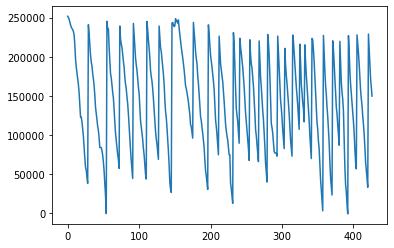

In [290]:
plt.plot(cp5.DIFFERENCE)

In [292]:
cp5.DIFFERENCE[0:10]

0    251620
1    250150
2    247810
3    244060
4    240600
5    237930
6    235930
7    234680
8    232180
9    227910
Name: DIFFERENCE, dtype: int64

# Caso Classico

In [294]:
cp5["DIFFERENCE_CLASSIC"] = cp5["VALUE_IN"] - cp5["VALUE_OUT"]

In [295]:
cp5.head(60)

,DT_REFERENCE,VALUE_OUT,VALUE_IN,VALUE_CHARGE_OUT,VALUE_CHARGE_IN,DIFFERENCE,DIFFERENCE_CLASSIC
0,2021-08-03,380.0,0.0,0.0,252000.0,251620,-380.0
1,2021-08-04,1470.0,0.0,0.0,0.0,250150,-1470.0
2,2021-08-05,2340.0,0.0,0.0,0.0,247810,-2340.0
3,2021-08-06,3750.0,0.0,0.0,0.0,244060,-3750.0
4,2021-08-07,3460.0,0.0,0.0,0.0,240600,-3460.0
5,2021-08-08,2670.0,0.0,0.0,0.0,237930,-2670.0
6,2021-08-09,2000.0,0.0,0.0,0.0,235930,-2000.0
7,2021-08-10,1250.0,0.0,0.0,0.0,234680,-1250.0
8,2021-08-11,2500.0,0.0,0.0,0.0,232180,-2500.0
9,2021-08-12,4270.0,0.0,0.0,0.0,227910,-4270.0


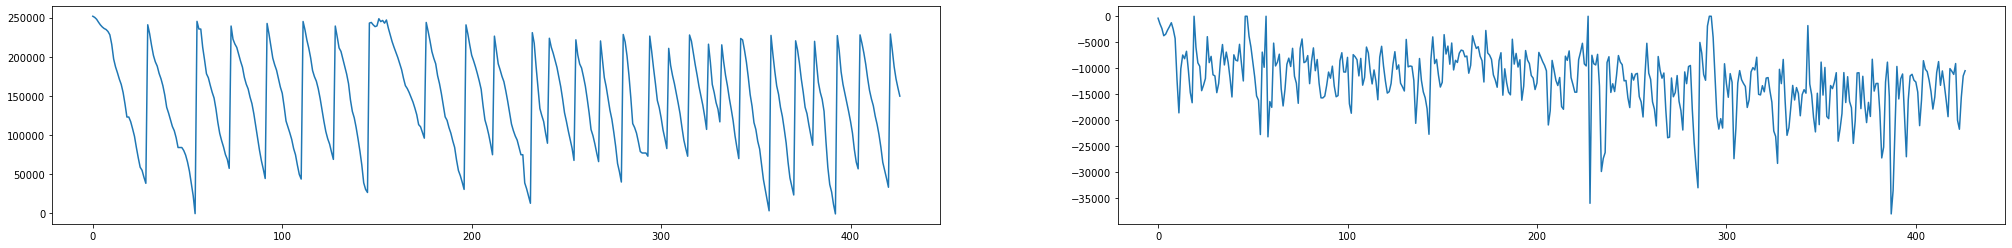

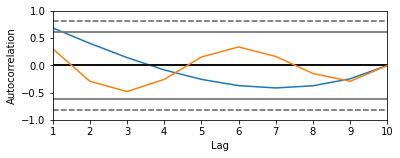

In [318]:
plt.figure(figsize=(35,4))
plt.subplot(1,2,1)
plt.plot(cp5.DIFFERENCE)
plt.subplot(1,2,2)
plt.plot(cp5.DIFFERENCE_CLASSIC)
plt.show()
plt.figure(figsize=(6,2))
pd.plotting.autocorrelation_plot(cp5.DIFFERENCE[0:10])
pd.plotting.autocorrelation_plot(cp5.DIFFERENCE_CLASSIC[0:10])
plt.show()